# Linear Regression

*In my opinion, Linear Regression is the most important Machine Learning model that exists. It is worth to study well.*

* predicting continous variables is commonplace in data science
* the results are interpretable
* can solve complex problems with proper engineering of features
* Linear Regression has been backed up by deep statistical research
* Linear Regression is the base to understand other linear models (such as Logistic Regression or Poisson Regression)
* Prerequisite for understanding neural networks
* very often does the job sufficiently well

In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1. Define Business Goal

**Predict the amount of rental bicycles for a given day.**

### 2. Get Data

In [3]:
df = pd.read_csv('../data/bicycles/train.csv', index_col=0)
df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [41]:
df['hour'] = pd.to_datetime(df.index).hour
df['day'] = df.hour.between(6, 22).astype(int) # 1 for daytime, 0 for night
df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1


### 3. Split Data into Training, Validation and Test sets
The test set has been already sliced off by Kaggle. They only give us the input data but not the correct results.

In [44]:
# what do we need to fill into the gap?
train, val = train_test_split(df, random_state=7) # make your experiment reproducible

In [45]:
# how can we check the number of rows and columns?
train.shape, val.shape

((8164, 13), (2722, 13))

### 4. Explore Data

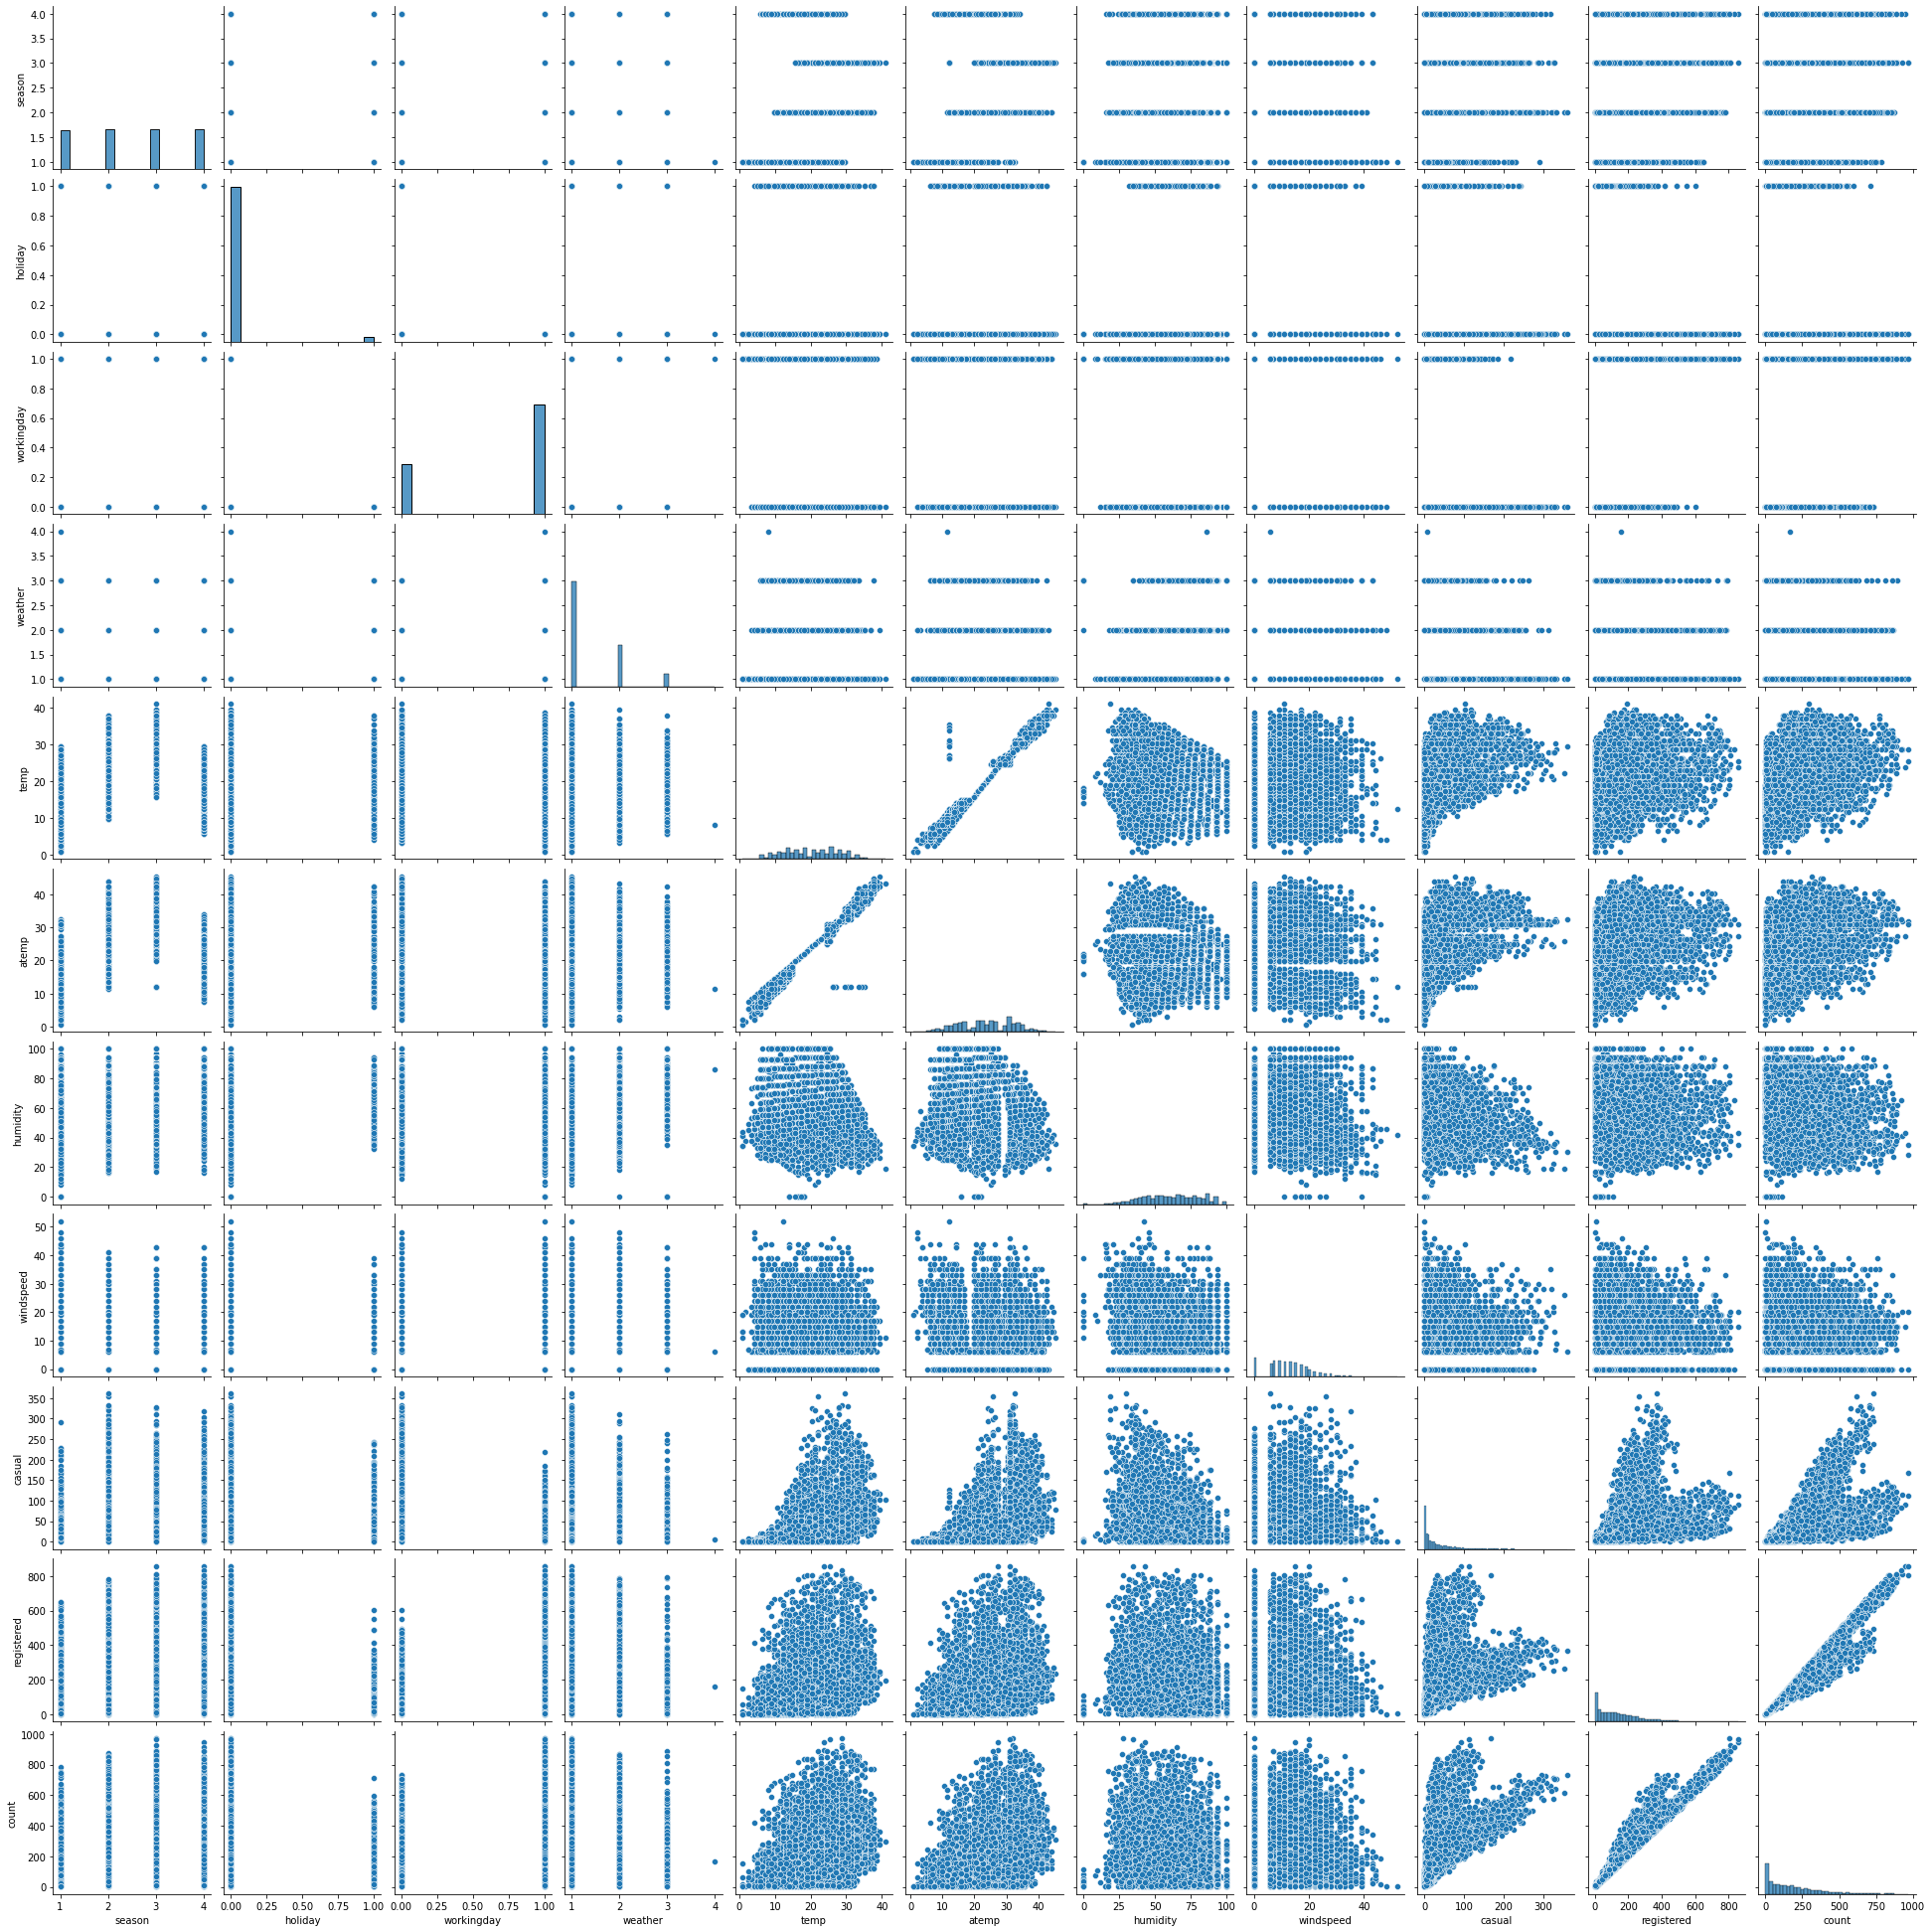

In [6]:
sns.pairplot(train)

<AxesSubplot:>

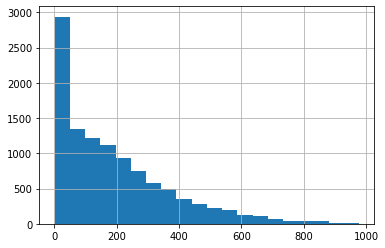

In [8]:
# what else might we want to look at?
# the 'target' column - what we want to predict
df['count'].hist(bins=20)

In [ ]:
# this is a typical distribution of count data - we might want to log-normalize

### 5. Define X and y

In [11]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [48]:
# X is a matrix of input features
Xtrain = train[['season','holiday','workingday','weather','temp', 'hour', 'day']]
Xval = val[['season','holiday','workingday','weather','temp', 'hour', 'day']]

# y is a vector of scalar values --> Regression
ytrain = train['count']
yval = val['count']

In [49]:
Xtrain.shape, ytrain.shape

((8164, 7), (8164,))

In [50]:
Xval.shape, yval.shape

((2722, 7), (2722,))

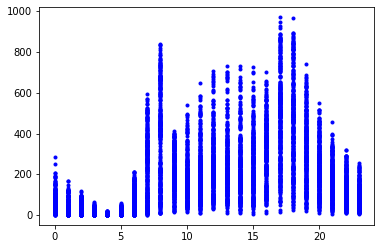

In [51]:
plt.plot(Xtrain['hour'], ytrain, 'b.')

### 6. Train a Linear Regression Model

$y = ax + b$

* y and x are our training data
* a and b are *model parameters* that we fit
* we want the model to minimize $abs(y_{predicted} - y_{real})$

The model is:

$\hat y = w_1x_1 + w_2x_2 + .. + w_nx_n + w_0$

In linear regression, you have n(features)+1 model parameters.

There are two ways to solve a Linear Regression Model

#### a) Normal Equation

Uses an analytical approach to calculate coefficients directly.
This is a closed-form solution called the **Normal Equation**

The Normal Equation has two big disadvantages:

* quadratic time complexity $O(N^2)$
* it can gets stuck if your features are redundant

Usually, b) is the better choice.

#### b) Gradient Descent

Iteratively optimizes the coefficients to find the lowest possible MSE.

* always finds the minimum (MSE is a convex function)
* partial derivative (linear time complexity to data points and features)

This is the implementation used in practically all common libraries (scikit, statsmodels, R, Spark, TensorFlow).

In [52]:
# train the model
m = LinearRegression(fit_intercept=True)
m.fit(Xtrain, ytrain)

LinearRegression()

### 7. Evaluate the Model

#### R squared

* 0 = no explainability from the model's correlation
* 1 = the model completely explains the variance in the data

#### MSE

* Mean Squared Error
* tt is very sensitve to outliers - each residual is squared, so
* residuals greater than one have a disproportionate big effect on outliers
* residuals less than one have a disproportionate small effect on outliers

#### MAE

* Mean Absolute Error
* average of the absolute residuals
* less sensitive to outliers than the MSE
* same unit as the target variable

#### RMSL

* Root Mean Squared Log Error
* doesn't penalise over-estimates as much as underestimates
* good for count data that stretches over several orders of magnitude


In [53]:
ypred = m.predict(Xtrain)
mse_train = mean_squared_error(ytrain, ypred)
mae_train = mean_absolute_error(ytrain, ypred)

print(f"training MSE {mse_train:4.2f}")
print(f"training MAE {mae_train:4.2f}")

training MSE 18537.70
training MAE 99.94


In [54]:
ypred_val = m.predict(Xval)
mse_val = mean_squared_error(yval, ypred_val)
mae_val = mean_absolute_error(yval, ypred_val)
print(f"validation MSE {mse_val:4.2f}")
print(f"validation MAE {mae_val:4.2f}")

validation MSE 18525.01
validation MAE 100.28


In [56]:
# tomorrow's forectast in the Washington DC area is:
#workday = 1 ; temperature low 23 °C and temperatura high 32° 

# season','holiday','workingday','weather','temp', 'hour', 'day'
Xpred = [[3, 0, 1, 1, 32.0, 15, 1]] # input is always a matrix
round(m.predict(Xpred)[0], 1)

356.0

In [57]:
# inspect the model parameters (coefficients)
# y = a1 * x1 + a2 * x2 ... + b
m.coef_.round(1), m.intercept_.round(1)

(array([ 16.2,  -6.2,   5. , -34. ,   6.6,   2.8, 182.5]), -99.2)

In [61]:
columns = ['season','holiday','workingday','weather','temp', 'hour', 'day']
for col, c in zip(columns, m.coef_):
    print(f"{col:10} {c:10.2f}")

season          16.24
holiday         -6.20
workingday       5.01
weather        -34.01
temp             6.60
hour             2.79
day            182.55


### Statsmodels

like R or Matlab - nice statistical detail

In [62]:
from statsmodels.regression.linear_model import OLS

In [63]:
Xtrain['intercept'] = 1  # <-- OLS does not do this on its own

<ipython-input-63-cfb0f8b26991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['intercept'] = 1  # <-- OLS does not do this on its own


In [64]:
sm = OLS(ytrain, Xtrain)  # opposite order
result = sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     909.3
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:03:59   Log-Likelihood:                -51700.
No. Observations:                8164   AIC:                         1.034e+05
Df Residuals:                    8156   BIC:                         1.035e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        16.2364      1.405     11.555      0.000      13.482      18.991
holiday       -6.1999      9.574     -0.648      0.517     -24.968      12.568
workingday     5.0083      3.368      1.487      0.137      -1.594      11.611
weather      -34.0111      2.386    -14.257      0.000     -38.688     -29.335
temp           6.5970      0.205     32.242      0.000       6.196       6.998
hour           2.7860      0.264     10.550      0.000       2.268       3.304
day          182.5455      4.017     45.439      0.000     174.670     190.421
intercept    -99.1684      6.768    -14.652      0.000    -112.436     -85.901
==============================================================================
Omnibus:                     1890.549   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4379.758
Skew:                           1.303   Prob(JB):                         0.00
Kurtosis:                       5.467   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""